In [37]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [38]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [39]:
!ln -s "/gdrive/My Drive/MLHC_project" "/content/MLHC_project"

ln: failed to create symbolic link '/content/MLHC_project/MLHC_project': Operation not supported


# Get Data

In [40]:
clinical_data_orig = pd.read_excel('MLHC_project/Data/clinical_data.IGV.xlsx', index_col=0).set_index('Code')

In [41]:
olink_clinical_data = pd.read_excel('MLHC_project/Data/olink_clinical.xlsx', index_col=0, header=[0,1,2,3,4])
olink_data = olink_clinical_data.filter(like='Olink', axis=1)

## Preprocess

In [42]:
clinical_data = clinical_data_orig.copy()

In [43]:
#fixed typo in column name
clinical_data.rename(columns={'haldr2': 'hladr2'}, inplace=True)

<b> Add age-group column

In [44]:
age_groups = [(20, 29), (30, 39), (40, 49), (50, 59), (60, 69), (70, 79), (80, 89), (90, 99)]

In [45]:
def assign_age_group(age):
    for age_group in age_groups:
        if age_group[0] <= age <= age_group[1]:
            return f"{age_group[0]}-{age_group[1]}"
    return None

In [46]:
clinical_data['age-group'] = clinical_data['age'].apply(assign_age_group)

<b> Create enrolled data (enrolled = got treatment)

In [47]:
clinical_data_not_enrolled = clinical_data[clinical_data['enrolment'] == 'Screening failure']
clinical_data_enrolled = clinical_data[clinical_data['enrolment'] == 'Yes']

In [48]:
clinical_data_not_enrolled.shape

(204, 1183)

# Basic Analysis

**28 day outcome**

In [49]:
outcome = clinical_data['outcome28'].copy()
outcome.replace({'Yes':1,'No':0},inplace=True)

print(f"Out of the 240 patients, {outcome.sum()} did not survive beyond the 28-day cutoff point, which is {outcome.sum()/outcome.shape[0]} of the patients")

Out of the 240 patients, 144 did not survive beyond the 28-day cutoff point, which is 0.6 of the patients


In [50]:
outcome = clinical_data_enrolled['outcome28'].copy()
outcome.replace({'Yes':1,'No':0},inplace=True)

print(f"Out of the 36 enrolled patients, {outcome.sum()} did not survive beyond the 28-day cutoff point, which is {outcome.sum()/outcome.shape[0]:.3f} of the patients")

Out of the 36 enrolled patients, 32 did not survive beyond the 28-day cutoff point, which is 0.889 of the patients


# Distribution plots

In [51]:
fontsize=20

<b>Center

All

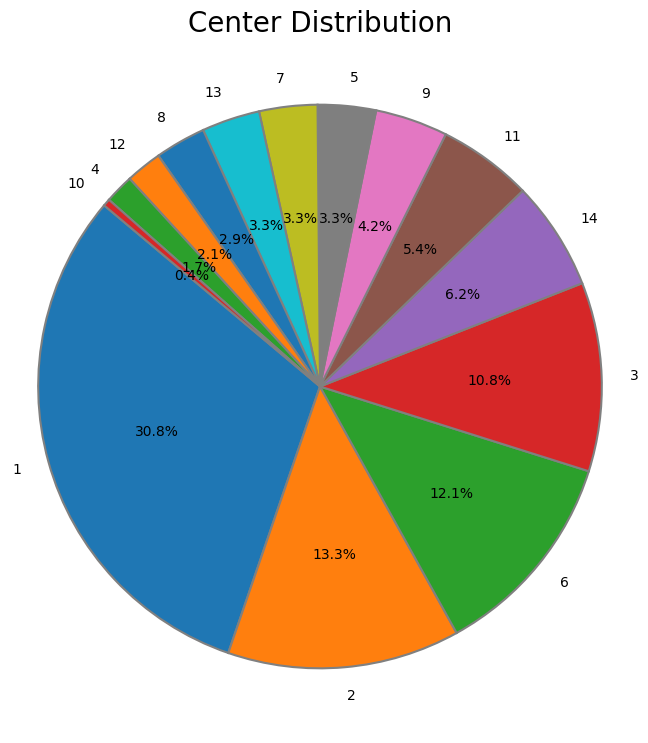

In [52]:
center_counts = clinical_data['Center'].value_counts()
labels = list(center_counts.index)

plt.figure(figsize=(8,9))
plt.pie(center_counts, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Center Distribution', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/center_distribution', bbox_inches="tight")

Enrolment

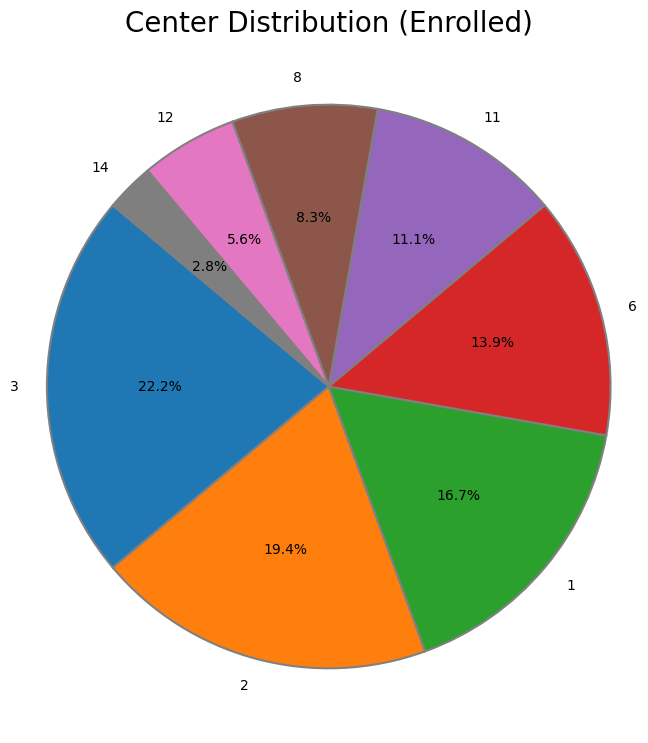

In [53]:
center_counts = clinical_data_enrolled['Center'].value_counts()
labels = list(center_counts.index)

plt.figure(figsize=(8,9))
plt.pie(center_counts, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Center Distribution (Enrolled)', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/center_distribution_enrolled', bbox_inches="tight")

<b>Gender

All

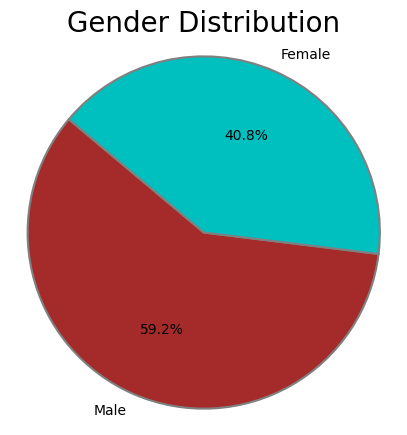

In [54]:
gender_counts = clinical_data['gender'].value_counts()
labels = list(gender_counts.index)

colors = ['brown', 'c']
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Gender Distribution', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/gender_distribution', bbox_inches="tight")

Enrolment

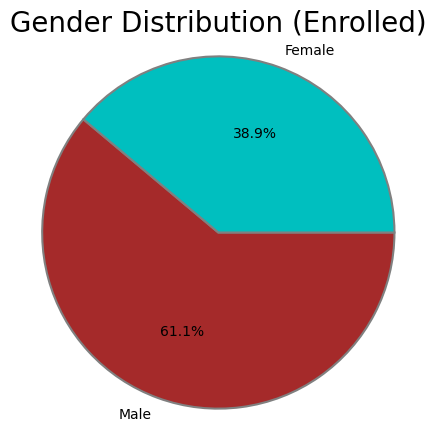

In [55]:
gender_counts = clinical_data_enrolled['gender'].value_counts()
labels = list(gender_counts.index)

colors = ['brown', 'c']
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Gender Distribution (Enrolled)', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/gender_distribution_enrolled', bbox_inches="tight")

<b>Age

In [56]:
print(f"The mean age of patients is: {clinical_data['age'].mean():.3f} and the standard deviation is: {clinical_data['age'].std():.3f}")

The mean age of patients is: 72.633 and the standard deviation is: 14.439


In [57]:
print(f"The mean age of patients (enrolled) is: {clinical_data_enrolled['age'].mean():.3f} and the standard deviation is: {clinical_data_enrolled['age'].std():.3f}")

The mean age of patients (enrolled) is: 70.083 and the standard deviation is: 12.575


All

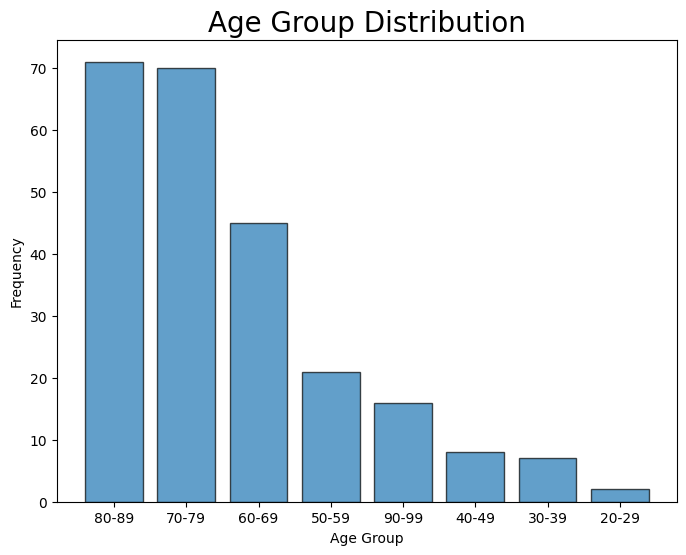

In [58]:
age_group_counts = clinical_data['age-group'].value_counts()
labels = list(age_group_counts.index)

plt.figure(figsize=(8, 6))
plt.bar(labels, age_group_counts, edgecolor='black', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Group Distribution', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/age_distribution', bbox_inches="tight")

No Enrolment

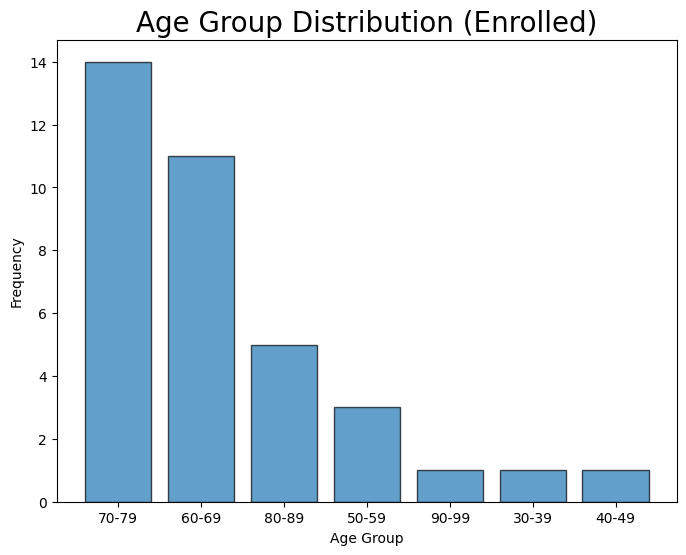

In [59]:
age_group_counts = clinical_data_enrolled['age-group'].value_counts()
labels = list(age_group_counts.index)

plt.figure(figsize=(8, 6))
plt.bar(labels, age_group_counts, edgecolor='black', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Group Distribution (Enrolled)', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/age_distribution_enrolled', bbox_inches="tight")

<b>Septic shock

All

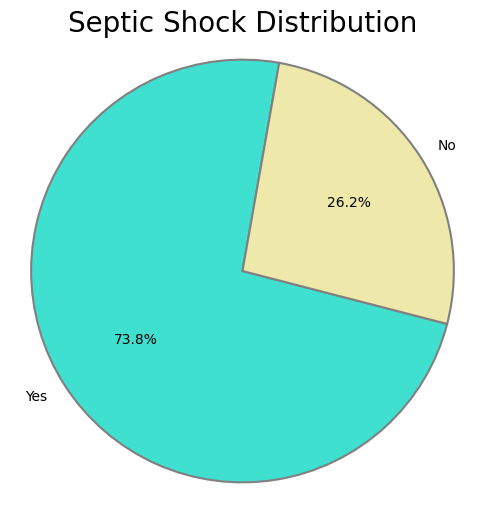

In [60]:
sshock_counts = clinical_data['sshock'].value_counts()
labels = sshock_counts.index
colors = ['turquoise', 'palegoldenrod']
plt.figure(figsize=(6,6))
plt.pie(sshock_counts, labels=labels, autopct='%1.1f%%', startangle=80, colors=colors, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Septic Shock Distribution', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/sshock_distribution', bbox_inches="tight")

Enrolment

Text(0.5, 1.0, 'Septic Shock Distribution')

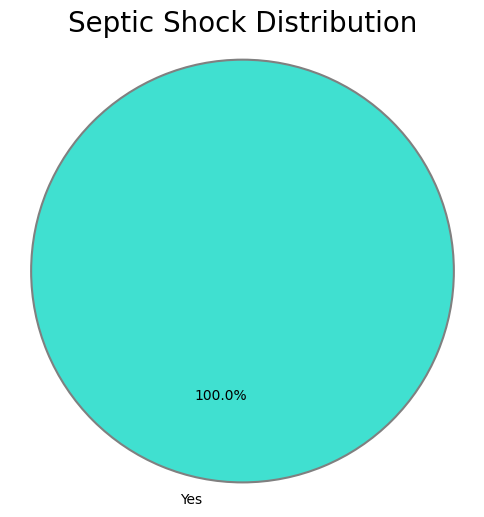

In [61]:
sshock_counts = clinical_data_enrolled['sshock'].value_counts()
labels = sshock_counts.index
colors = ['turquoise', 'palegoldenrod']
plt.figure(figsize=(6,6))
plt.pie(sshock_counts, labels=labels, autopct='%1.1f%%', startangle=80, colors=colors, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Septic Shock Distribution', fontsize=fontsize)

<b>State

All

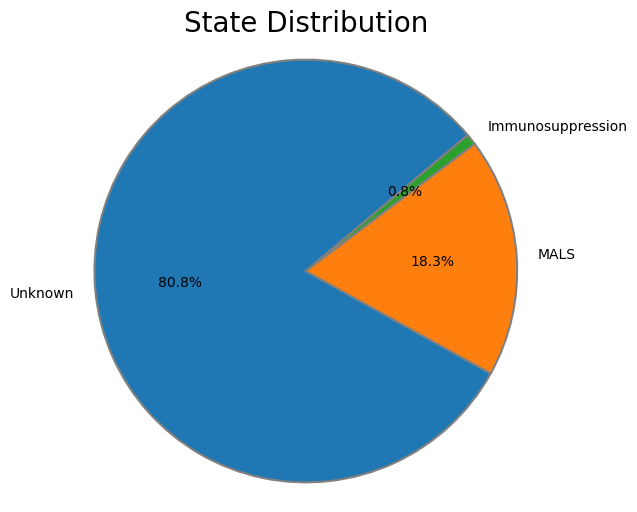

In [62]:
state_counts = clinical_data['state'].value_counts()
labels = state_counts.index

plt.figure(figsize=(6,6))
plt.pie(state_counts, labels=labels, autopct='%1.1f%%', startangle=40, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('State Distribution', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/states_distribution', bbox_inches="tight")

Enrolment

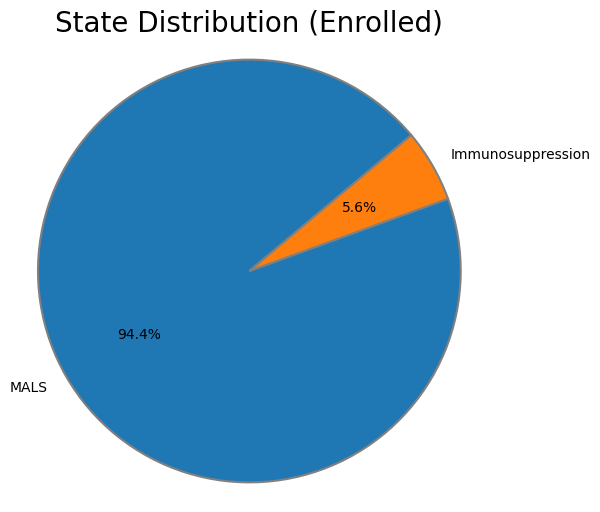

In [63]:
state_counts = clinical_data_enrolled['state'].value_counts()
labels = state_counts.index

plt.figure(figsize=(6,6))
plt.pie(state_counts, labels=labels, autopct='%1.1f%%', startangle=40, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('State Distribution (Enrolled)', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/states_distributiont_enrolled', bbox_inches="tight")

<b> Enrolled - treatment type

In [64]:
clinical_data['state'].value_counts()

Unknown              194
MALS                  44
Immunosuppression      2
Name: state, dtype: int64

In [65]:
clinical_data_enrolled['state'].value_counts()

MALS                 34
Immunosuppression     2
Name: state, dtype: int64

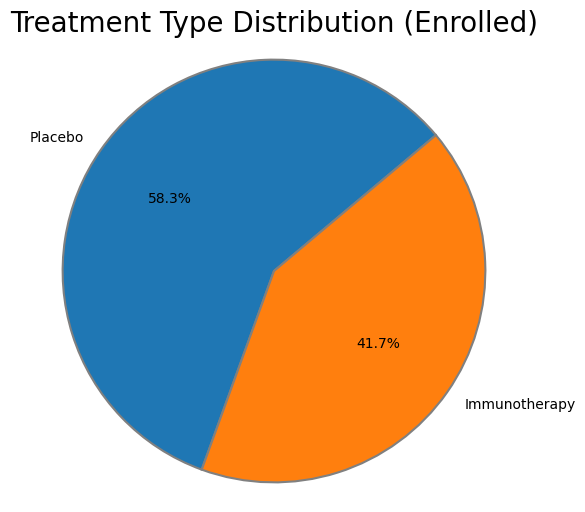

In [66]:
from matplotlib.offsetbox import Bbox
treatment_counts = clinical_data_enrolled['group'].value_counts()
labels = treatment_counts.index

plt.figure(figsize=(6,6))
plt.pie(treatment_counts, labels=labels, autopct='%1.1f%%', startangle=40, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Treatment Type Distribution (Enrolled)', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/treatment_distribution_enrolled', bbox_inches='tight')

<b>SOFA score

In [67]:
print(f"The average day 1 SOFA score of patients is: {clinical_data['sofa1'].mean():.3f} and the standard deviation is: {clinical_data['sofa1'].std():.3f}")

The average day 1 SOFA score of patients is: 10.983 and the standard deviation is: 4.111


In [68]:
print(f"The average day 1 SOFA score of patients (enrolled) is: {clinical_data_enrolled['sofa1'].mean():.3f} and the standard deviation is: {clinical_data_enrolled['sofa1'].std():.3f}")

The average day 1 SOFA score of patients (enrolled) is: 14.417 and the standard deviation is: 2.931


In [69]:
clinical_data_sofa = pd.concat([clinical_data.filter(like='sofa'), clinical_data.filter(like='SOFA')], axis=1)

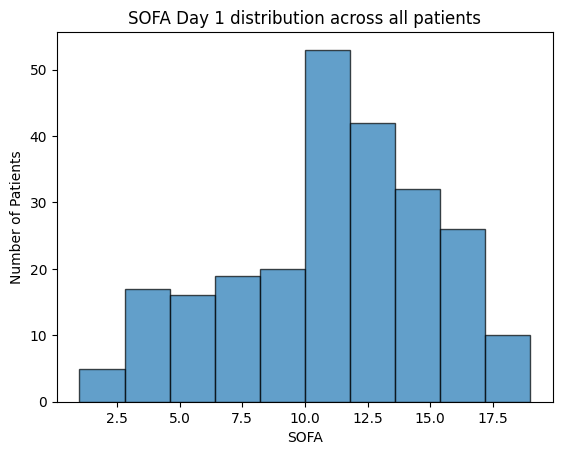

In [70]:
plt.hist(clinical_data['sofa1'],edgecolor='black',bins=10,alpha=0.7)
plt.xlabel('SOFA')
plt.ylabel('Number of Patients')
plt.title('SOFA Day 1 distribution across all patients')
plt.savefig('MLHC_project/Data_analysis/SOFA_Day1_distribution', bbox_inches="tight")

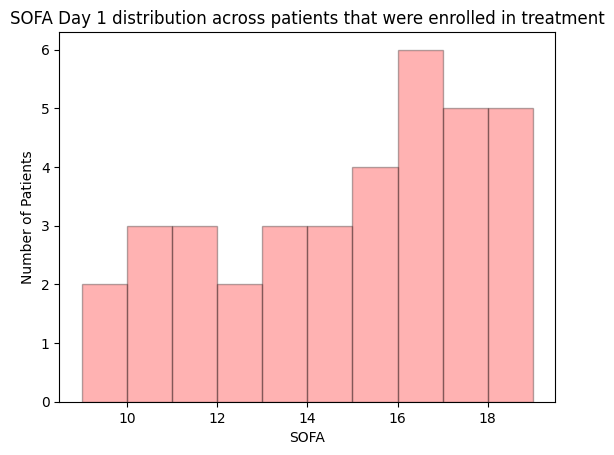

In [71]:
sofa1_enrolled = clinical_data[clinical_data['enrolment'] == 'Yes']['sofa1']
plt.hist(sofa1_enrolled,edgecolor='black',color = 'red',bins=10,alpha=0.3)
plt.xlabel('SOFA')
plt.ylabel('Number of Patients')
plt.title('SOFA Day 1 distribution across patients that were enrolled in treatment')
plt.savefig('MLHC_project/Data_analysis/SOFA_Day1_distribution_enrolled', bbox_inches="tight")

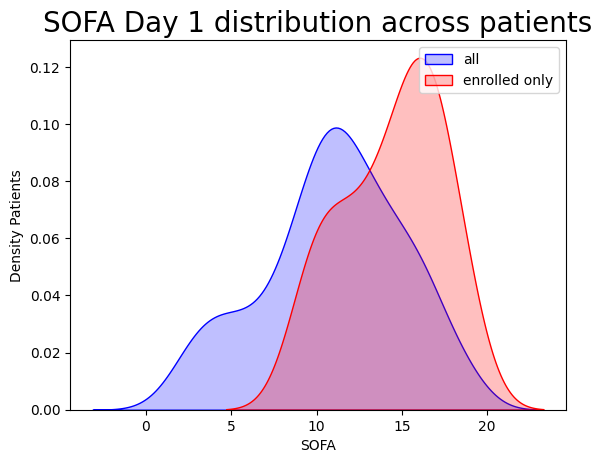

In [122]:
# together
sns.kdeplot(clinical_data['sofa1'], fill=True, color='blue')
sns.kdeplot(sofa1_enrolled, fill=True, color='red')
plt.legend(['all','enrolled only'])
plt.xlabel('SOFA')
plt.ylabel('Density Patients')
plt.title('SOFA Day 1 distribution across patients', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/SOFA_Day1_distribution_density', bbox_inches="tight")

<b>Diseases

In [73]:
# diseases cols we inferred from looking at the data columns
disease_cols = ['ac', 'bsi', 'cap', 'hap', 'vap',	'dm2', 'hd', 'crd', 'copd', 'biologicals', 'chemotherapy', 'nhl', 'solidmalignancy',
                'metastasis', 'tia', 'chemorhage', 'dementia', 'parkinson', 'nephrolithiasis', 'gallstones', 'chd', 'af', 'cabg', 'csp', 'cirrhosis',	'stent',	'hipsurgery', 'thalassemia', 'depression', 'ltcf', 'hemodialysis', 'intake3', 'surgery']
clinical_data_diseases = clinical_data[disease_cols].replace({'Yes': True, 'No': False})

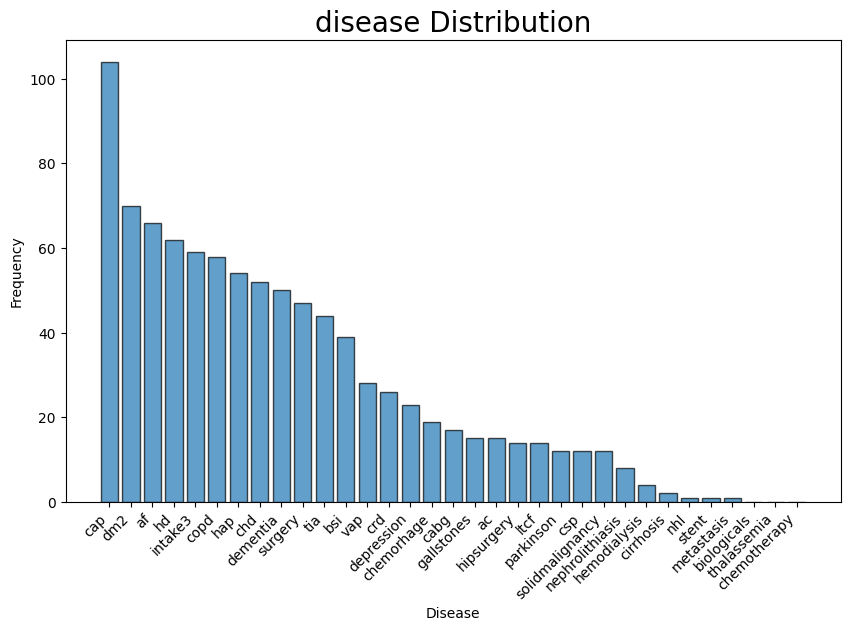

In [74]:
disease_counts = clinical_data_diseases.sum().sort_values(ascending=False)
labels = list(disease_counts.index)

plt.figure(figsize=(10, 6))
plt.bar(labels, disease_counts, edgecolor='black', alpha=0.7)
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('disease Distribution', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/disease_distribution', bbox_inches="tight")

Enrollment

In [75]:
clinical_data_diseases_enrolled = clinical_data_enrolled[disease_cols].replace({'Yes': True, 'No': False})

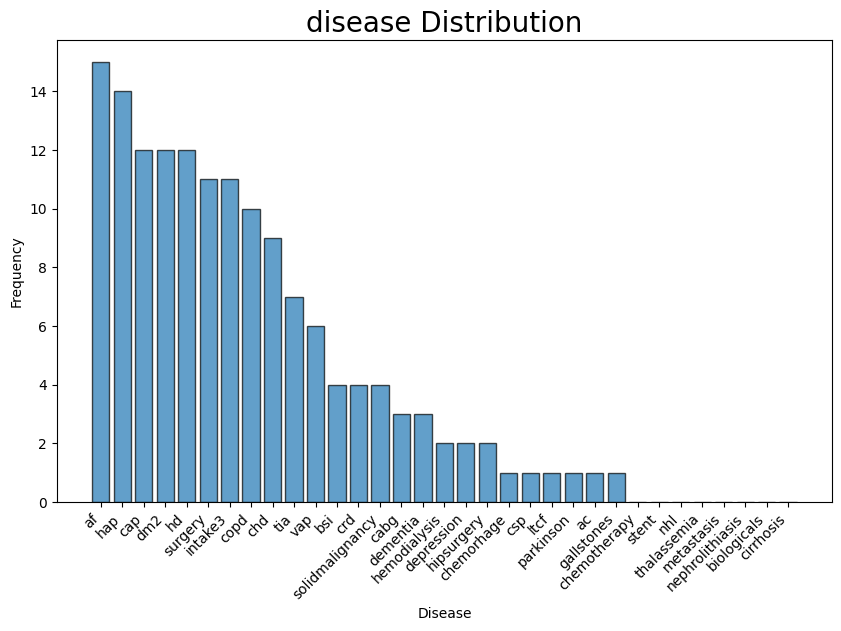

In [76]:
disease_counts_enrolled = clinical_data_diseases_enrolled.sum().sort_values(ascending=False)
labels = list(disease_counts_enrolled.index)

plt.figure(figsize=(10, 6))
plt.bar(labels, disease_counts_enrolled, edgecolor='black', alpha=0.7)
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('disease Distribution', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/disease_distribution_enrolled', bbox_inches="tight")

<b>Drugs

In [77]:
drugs_cols = clinical_data.filter(like='Intakeof').columns.to_list() + ['corticosteroids']
clinical_data_drugs = clinical_data[drugs_cols].replace({'Yes': True, 'No': False})

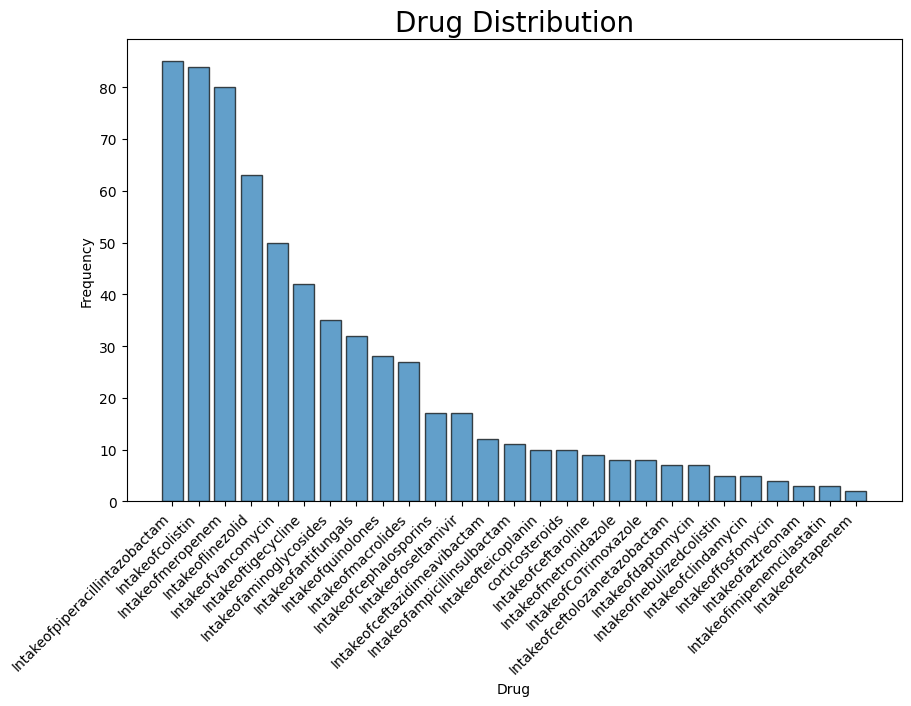

In [78]:
drugs_counts = clinical_data_drugs.sum().sort_values(ascending=False)
labels = list(drugs_counts.index)

plt.figure(figsize=(10, 6))
plt.bar(labels, drugs_counts, edgecolor='black', alpha=0.7)
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Drug Distribution', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/drug_distribution', bbox_inches="tight")

Enrollment

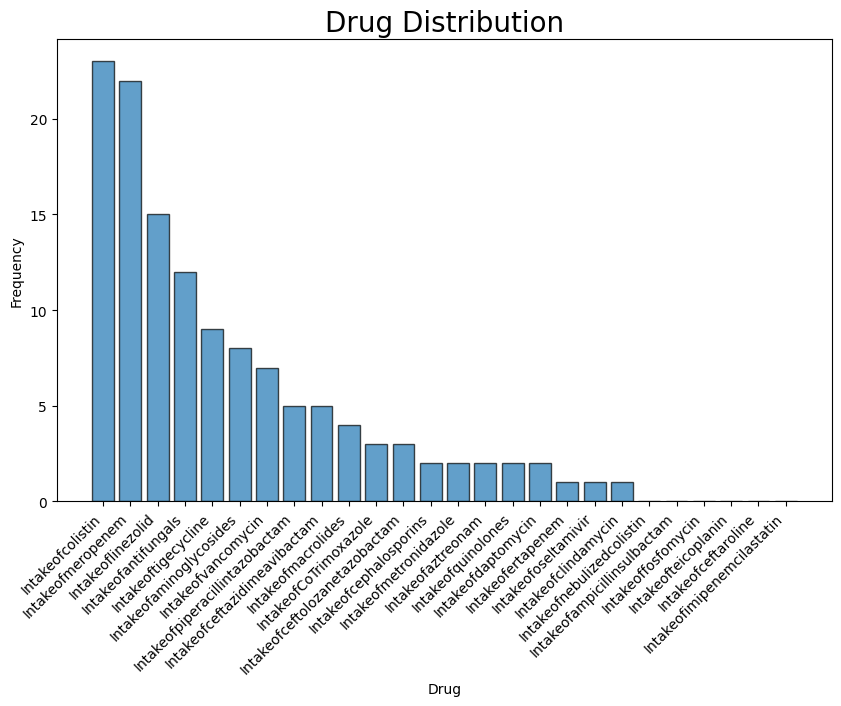

In [79]:
clinical_data_drugs_enrolled = clinical_data_enrolled.filter(like='Intakeof').replace({'Yes': True, 'No': False})
drugs_counts = clinical_data_drugs_enrolled.sum().sort_values(ascending=False)
labels = list(drugs_counts.index)

plt.figure(figsize=(10, 6))
plt.bar(labels, drugs_counts, edgecolor='black', alpha=0.7)
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Drug Distribution', fontsize=fontsize)
plt.savefig('MLHC_project/Data_analysis/drug_distribution_enrolled', bbox_inches="tight")

# Survival
KM curves

In [80]:
survived_15 = (clinical_data['survival28'] > 15).sum()
print(f'Number of patients that survived until day 15: {survived_15}')

Number of patients that survived until day 15: 118


In [81]:
#create df for survival plot
clinical_data_survival = pd.concat([clinical_data[['age-group', 'gender', 'state', 'group', 'Center', 'enrolment']], clinical_data.filter(like='survival')], axis=1)
clinical_data_survival['if_survived28'] = clinical_data_survival['survival28'].apply(lambda x: 0 if x==28 else 1)

In [82]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 10.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=05e2b6b63c7aad3c0438eb40c52955671ebc0b336a4de686c68f36e4f8dae6af
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [83]:
from lifelines import KaplanMeierFitter

## All

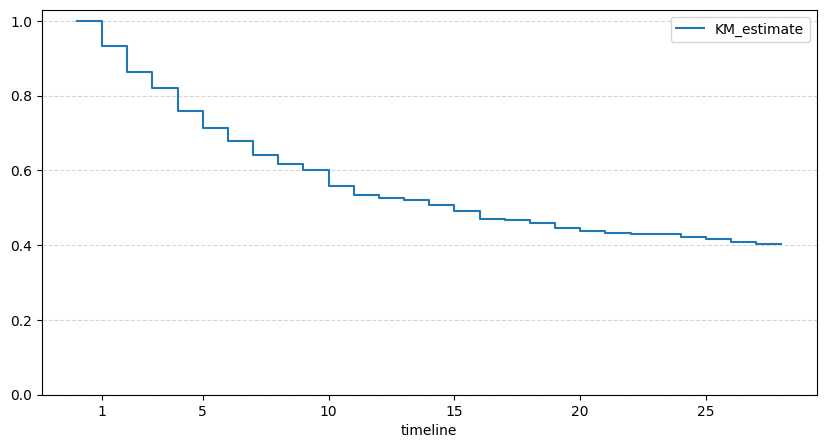

In [84]:
T = clinical_data_survival['survival28']
E = clinical_data_survival['if_survived28']

plt.figure(figsize=(10, 5))
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.plot_survival_function(ci_show=False)
plt.yticks(np.linspace(0, 1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks([1, 5, 10, 15, 20, 25])
plt.savefig('MLHC_project/Data_analysis/survival28_plot.png', bbox_inches="tight")

## By groups

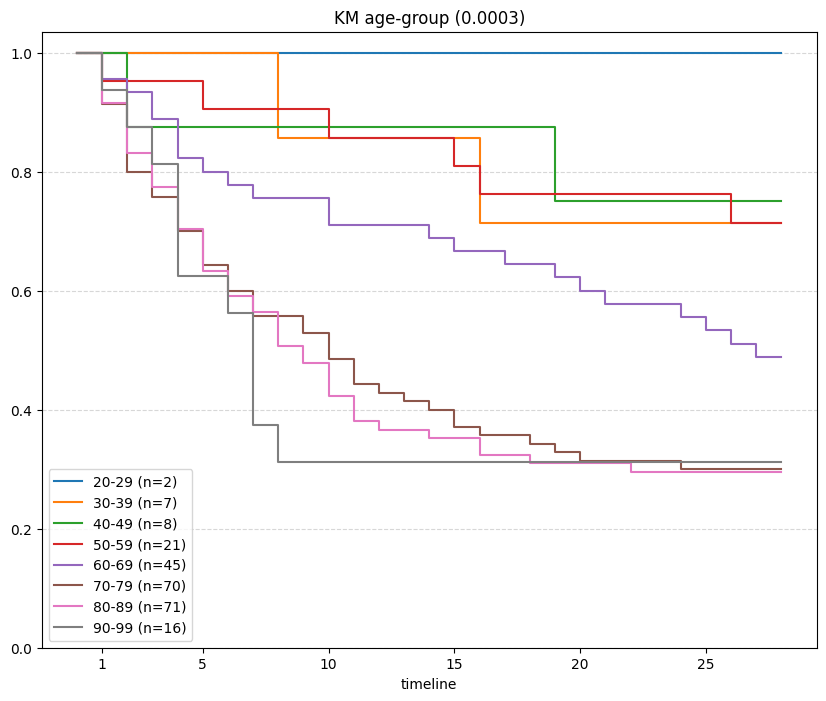

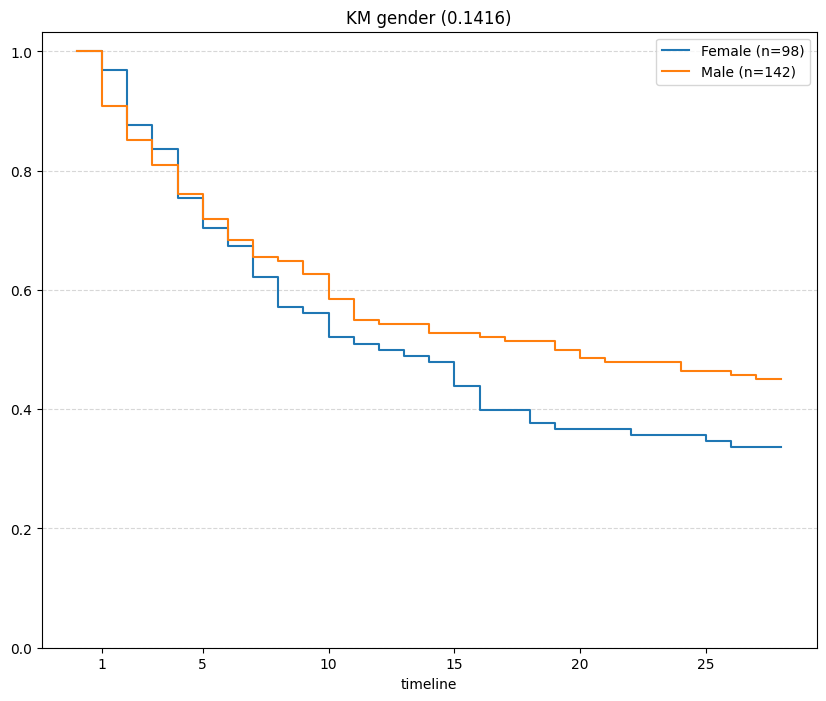

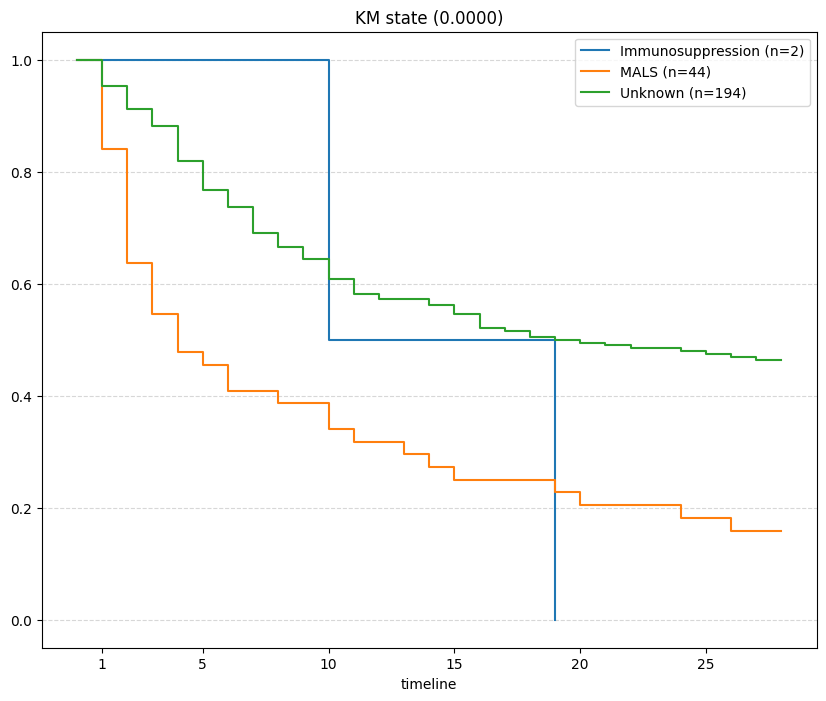

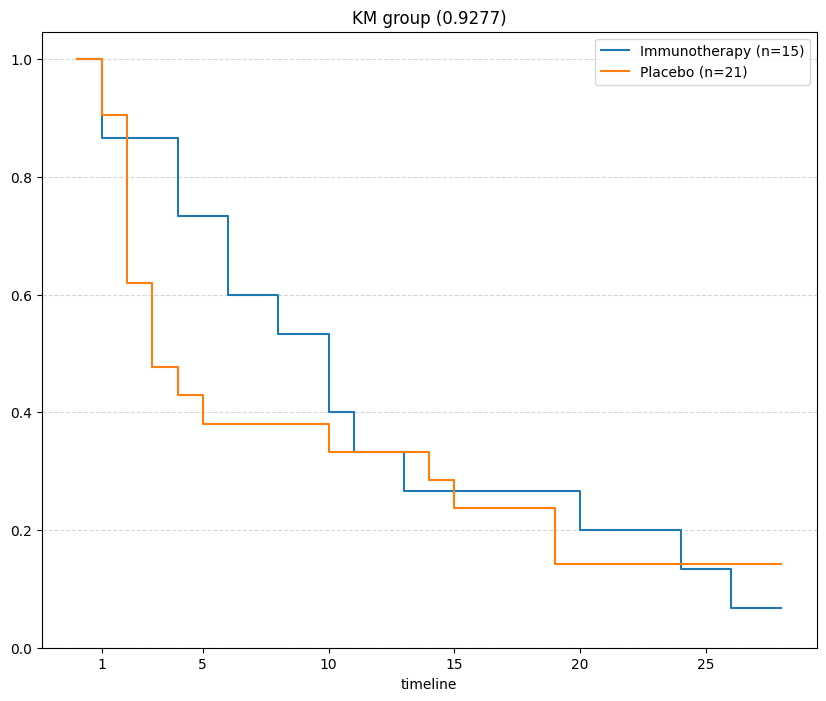

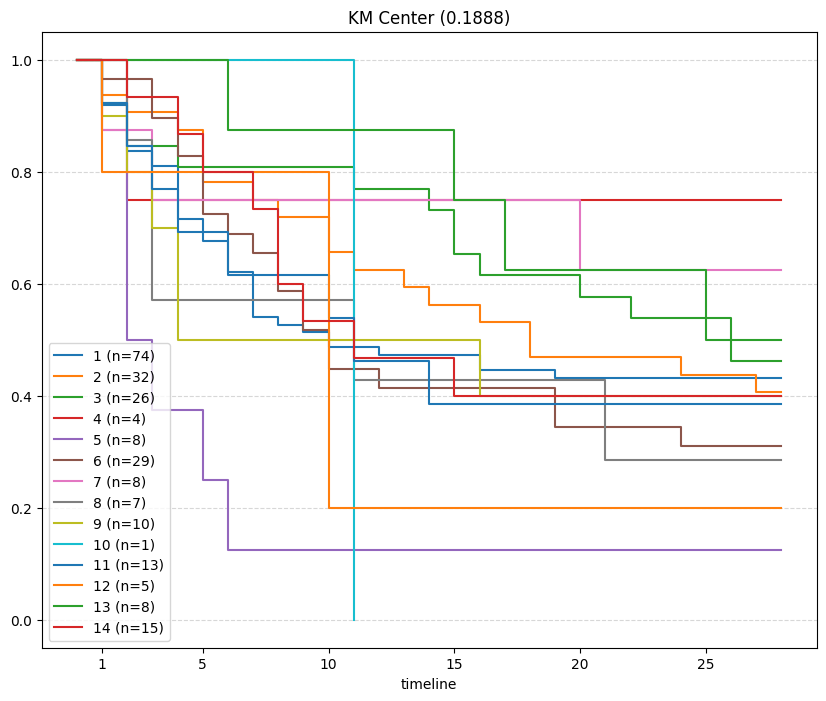

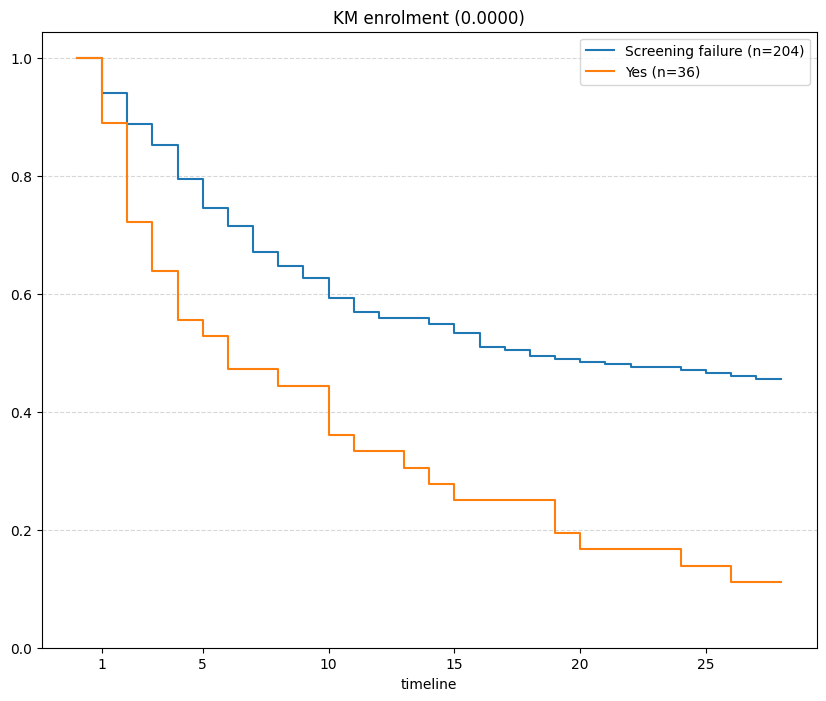

In [85]:
from lifelines import KaplanMeierFitter, statistics
import numpy as np
import matplotlib.pyplot as plt

def plot_survival_curves(df, group_column):
    kmf = KaplanMeierFitter()
    grouped = df.groupby(group_column)

    for group, group_data in grouped:
        T = group_data['survival28']
        E = group_data['if_survived28']
        group_size = len(group_data)
        kmf.fit(T, event_observed=E)
        kmf.plot_survival_function(ci_show=False, label=f"{group_data[group_column].iloc[0]} (n={group_size})")

    # Perform log-rank test for all pairs of groups
    groups = [group_data[group_data[group_column] == group] for group in group_data[group_column].unique()]
    result = statistics.multivariate_logrank_test(df['survival28'], df[group_column], df[['if_survived28']])
    p_value = result.p_value
    plt.title(f"KM {group_column} ({p_value:.4f})")

for group_column in ['age-group', 'gender', 'state', 'group', 'Center', 'enrolment']:
    plt.figure(figsize=(10, 8))
    plot_survival_curves(clinical_data_survival, group_column)

    plt.yticks(np.linspace(0, 1, 6))
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks([1, 5, 10, 15, 20, 25])
    plt.legend()
    plt.savefig(f'MLHC_project/Data_analysis/{group_column}_survival28_plot.png', bbox_inches="tight")

# Clinical data Preprocess

Create df that contains day_measurements only (and convert sofa_i to Day_sofa)

In [86]:
# sofa measurements
sofa_cols = []
for i in range(1,16):
    sofa_cols.append(f'sofa{i}')

In [87]:
clinical_day_depended_cols = clinical_data.filter(like='Day').columns.tolist() + sofa_cols
clinical_data_day_depended = clinical_data[clinical_day_depended_cols]

In [88]:
# change sofa cols to Day1_sofa...
for col_num in range(1, 16):
    clinical_data_day_depended= clinical_data_day_depended.rename(columns={f"sofa{col_num}": f"Day{col_num}_sofa"})

In [89]:
# drop values that don't appear in all of the days and are irrelevant:
clinical_data_day_depended = clinical_data_day_depended.drop(columns=['mHLA_Day1_Cutoff','mHLA_Day2_Cutoff','Ferritin_Day1_Cutoff','Ferritin_Day2_Cutoff','Ferritin_Day7_Cutoff','Ferritin_Day1_Followup_Cutoff',
'Ferritin_Day4_Followup_Cutoff','Ferritin_Day7_Followup_Cutoff', 'mHLA_Day7','CD_Day7','Ferritin_Day7'])

Check measurements that appear in all days (use only data until Day 15)

In [90]:
# check that for each day- same measurements // final 35 measurements per day
day_prefixes = [f'Day{i}' for i in range(1,16)]

# Extract the measurement names for each day
measurements_per_day = {}

for day in day_prefixes:
    measurements = [col.split("_")[1] for col in clinical_data_day_depended.columns if col.split("_")[0]== day]
    measurements_per_day[day] = measurements

# Check if measurements are the same for all days
common_measurements = set(measurements_per_day[day_prefixes[0]])
for day in day_prefixes[1:]:
    common_measurements &= set(measurements_per_day[day])

print(f'Number of measurments per day (for 15 days): {len(common_measurements)}')

Number of measurments per day (for 15 days): 35


change NaN to 'inf' if value is missing beacause the patient died

In [91]:
# if the survival day is x? are the measurements in day x should be imputed? (meaning using ">" OR ">=")
clinical_data_day_depended_processed = pd.merge(clinical_data_day_depended,clinical_data['survival28'],left_index=True,right_index=True,how='inner')
days = [i for i in range(29)]
cols = []
for day in days:
    cols = clinical_data_day_depended_processed.filter(like=f'Day{day}_').columns.tolist() + clinical_data_day_depended_processed.filter(like=f'_Day{day}').columns.tolist() + clinical_data_day_depended_processed.filter(like=f'sofa{day}').columns.tolist()
    for col in cols:
        #if a patient is still alive at this day keep the values. If the patient died before this day change the measurement value to "inf"
        clinical_data_day_depended_processed[col] = clinical_data_day_depended_processed[col].where(clinical_data_day_depended_processed['survival28'] >= day, 'inf')

# Olink data Preprocess

change NaN to 'inf' if value is missing beacause the patient died

In [92]:
olink_data_to_merge = olink_data.copy()
olink_data_to_merge.columns = olink_data_to_merge.columns.to_flat_index()

In [93]:
olink_with_survival = olink_data_to_merge.merge(clinical_data[['survival28']], right_index=True, left_index=True)

In [94]:
#if the survival day is x? are the measurements in day x should be imputed? (meaning using ">" OR ">=")
olink_with_survival_processed = olink_with_survival.copy()
days = {'BL': 1, 'D4': 4, 'D7': 7}
olink_cols = olink_with_survival.columns.tolist()
for day, day_num in days.items():
    cols = [x for x in olink_cols if x[-1] == day]
    for col in cols:
        #if a patient is still alive at this day keep the values. If the patient died before this day change the measurement value to "inf"
        olink_with_survival_processed[col] = olink_with_survival_processed[col].where(olink_with_survival_processed['survival28'] >= day_num, 'inf')

# Missing rates

##### for day dependant - In proportion to number of surviving patients - for each feature (clinical_data_preprocessed)

## Clinical data not day dependent

In [95]:
#@title Missing rate values
fixed_cols_clinical = ['Center', 'ID', 'state', 'enrolment', 'group', 'sshock', 'ShockClassification', 'MALS', 'immunosuppression', 'age', 'age-group', 'gender','survival28','hladr1','hladr2','ferritin1','ferritin2','quantibrite1','quantibrite2','Blood','Respiratory','Urine']
fixed_cols_clinical = set(fixed_cols_clinical + drugs_cols + disease_cols)
measurement_missrates={}
for measurement in fixed_cols_clinical:
  measurement_rate = clinical_data[measurement].isnull().sum() / clinical_data[clinical_data[measurement] != 'inf'][measurement].shape[0]
  measurement_missrates[measurement]=measurement_rate
  print(f"The missing rate of {measurement} is: {measurement_rate:.3%}")

The missing rate of nhl is: 0.000%
The missing rate of sshock is: 0.000%
The missing rate of depression is: 0.000%
The missing rate of ferritin1 is: 0.417%
The missing rate of Intakeofmeropenem is: 5.000%
The missing rate of Intakeofceftaroline is: 5.000%
The missing rate of Intakeofantifungals is: 5.000%
The missing rate of immunosuppression is: 0.000%
The missing rate of Intakeofmetronidazole is: 5.000%
The missing rate of age-group is: 0.000%
The missing rate of gallstones is: 0.000%
The missing rate of dementia is: 0.000%
The missing rate of ltcf is: 0.000%
The missing rate of Intakeofampicillinsulbactam is: 5.000%
The missing rate of cabg is: 0.000%
The missing rate of biologicals is: 0.000%
The missing rate of IntakeofCoTrimoxazole is: 5.000%
The missing rate of Intakeofquinolones is: 5.000%
The missing rate of hladr2 is: 35.000%
The missing rate of Intakeofcolistin is: 5.000%
The missing rate of Intakeofpiperacillintazobactam is: 5.417%
The missing rate of Intakeofcephalosporins

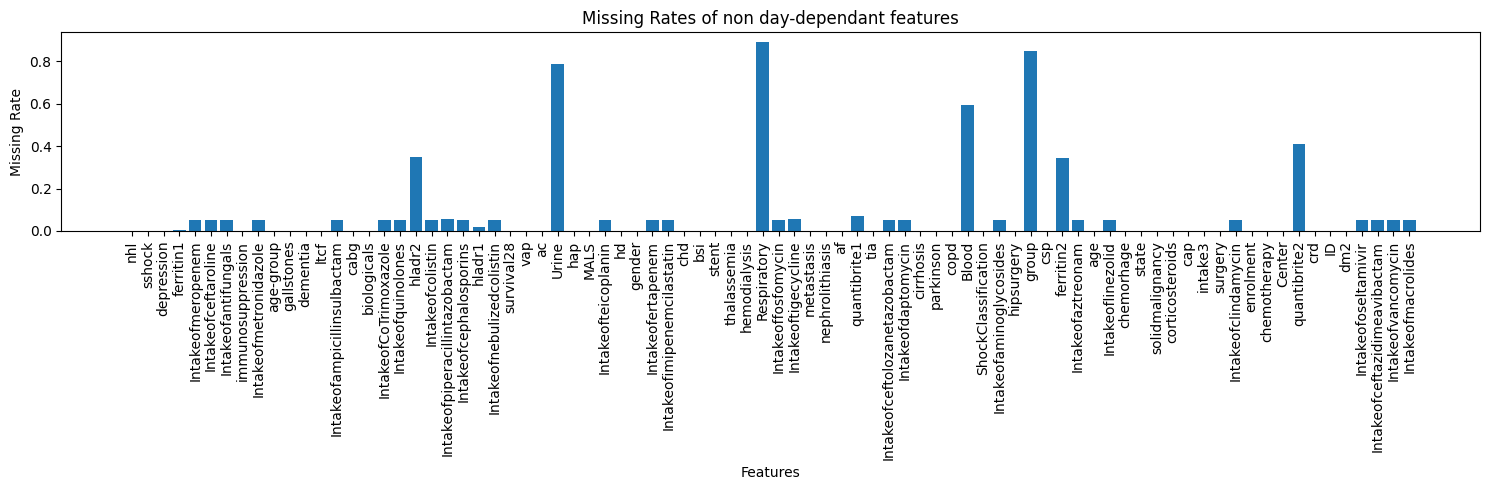

In [96]:
#@title Plot missing rate distribution
missing_rates_values = list(measurement_missrates.values())
plt.figure(figsize=(15, 5))
plt.bar(list(fixed_cols_clinical), missing_rates_values)
plt.xlabel('Features')
plt.ylabel('Missing Rate')
plt.title('Missing Rates of non day-dependant features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("MLHC_project/Missing Rates/clinical_data_fixed_features.png")

plt.show()

### Special columns to check

In [97]:
# hladr - decided to keep only *hladr1* and *hladr2*
# ferritin and quantibrite - only ferritin1 and 2, same for quantibrite1 and 2
# 'Blood','Respiratory','Urine'- duplicates with Day1_Blood,...
special_cols_to_check = ['hladr1','hladr2','ferritin1','ferritin2','quantibrite1','quantibrite2','Blood','Respiratory','Urine']

In [98]:
# columns we suspected to drop and have high missing rates or do not appear in all of the days
special_cols_to_drop =['mHLA_Day1_Cutoff','mHLA_Day2_Cutoff','Ferritin_Day1_Cutoff','Ferritin_Day2_Cutoff','Ferritin_Day7_Cutoff','Ferritin_Day1_Followup_Cutoff',
'Ferritin_Day4_Followup_Cutoff','Ferritin_Day7_Followup_Cutoff', 'mHLA_Day7','CD_Day7','Ferritin_Day7']
for measurement in special_cols_to_drop:
  measurement_rate = clinical_data[measurement].isnull().sum() / clinical_data[clinical_data[measurement] != 'inf'][measurement].shape[0]
  measurement_missrates[measurement]=measurement_rate
  print(f"The missing rate of {measurement} is: {measurement_rate:.3%}")

The missing rate of mHLA_Day1_Cutoff is: 7.083%
The missing rate of mHLA_Day2_Cutoff is: 40.000%
The missing rate of Ferritin_Day1_Cutoff is: 0.417%
The missing rate of Ferritin_Day2_Cutoff is: 34.167%
The missing rate of Ferritin_Day7_Cutoff is: 90.000%
The missing rate of Ferritin_Day1_Followup_Cutoff is: 85.417%
The missing rate of Ferritin_Day4_Followup_Cutoff is: 88.750%
The missing rate of Ferritin_Day7_Followup_Cutoff is: 91.250%
The missing rate of mHLA_Day7 is: 90.833%
The missing rate of CD_Day7 is: 90.000%
The missing rate of Ferritin_Day7 is: 90.000%


## Clinical Data Day Dependant

In [121]:
#@title Missing rate table
# Create a table of missing rate for each day and each measurement along the 15 days

measurement_day_missrates_df = pd.DataFrame(index=list(common_measurements),columns=day_prefixes)

for measurement in clinical_data_day_depended.columns[1:]:
  cur_day = measurement.split("_")[0]
  if cur_day in day_prefixes:
    measurement_rate = (clinical_data_day_depended_processed[measurement].isnull().sum() / clinical_data_day_depended_processed[clinical_data_day_depended_processed[measurement] != 'inf'].shape[0])
    feature = measurement.split("_")[1]
    measurement_day_missrates_df.loc[feature][cur_day] =  round(measurement_rate*100,3)
    # if 'INR' in measurement:print(f"The missing rate of {measurement} is: {measurement_rate:.3%}")

measurement_day_missrates_avg = {m:measurement_day_missrates_df.loc[m].mean() for m in common_measurements}

### Plot missing rate distribution

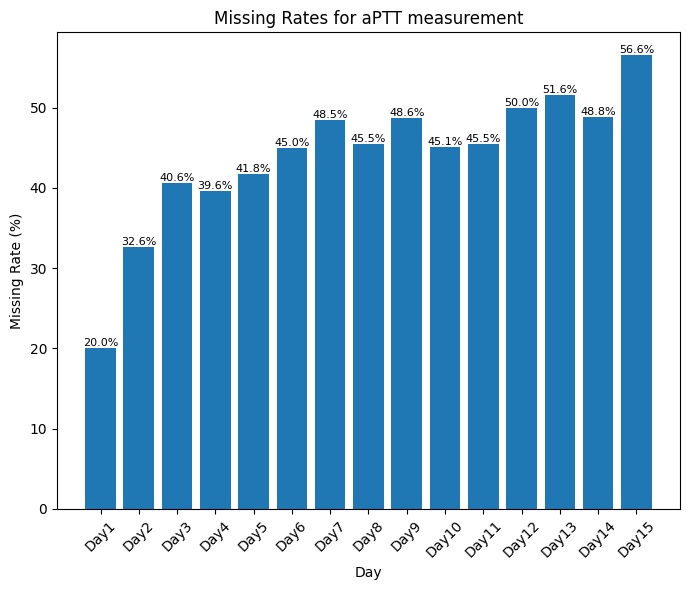

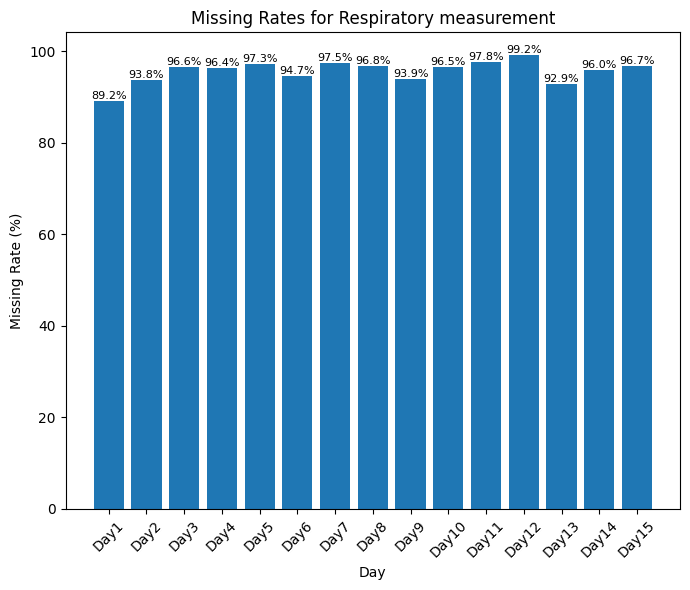

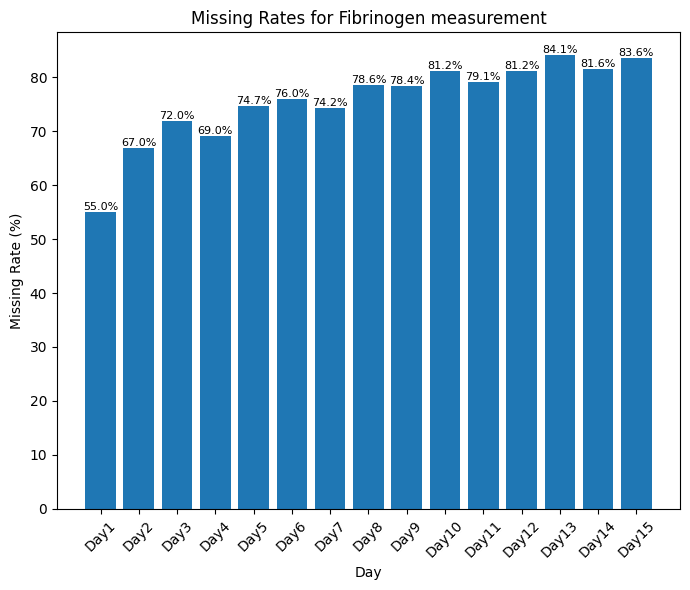

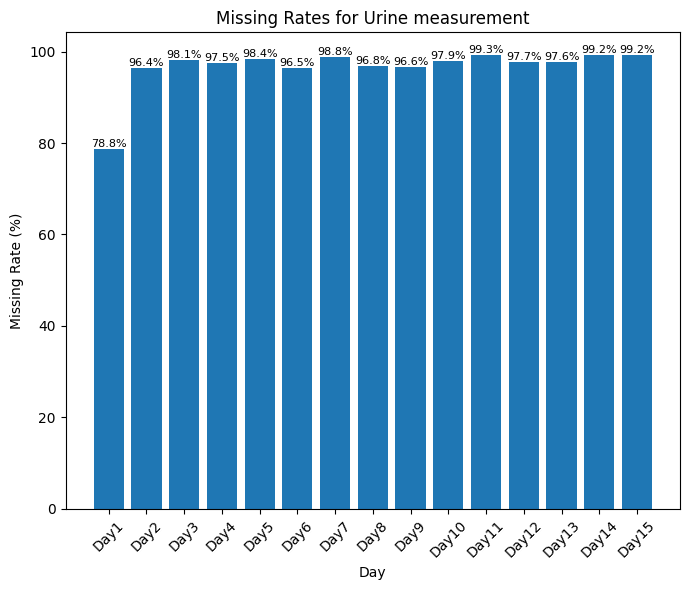

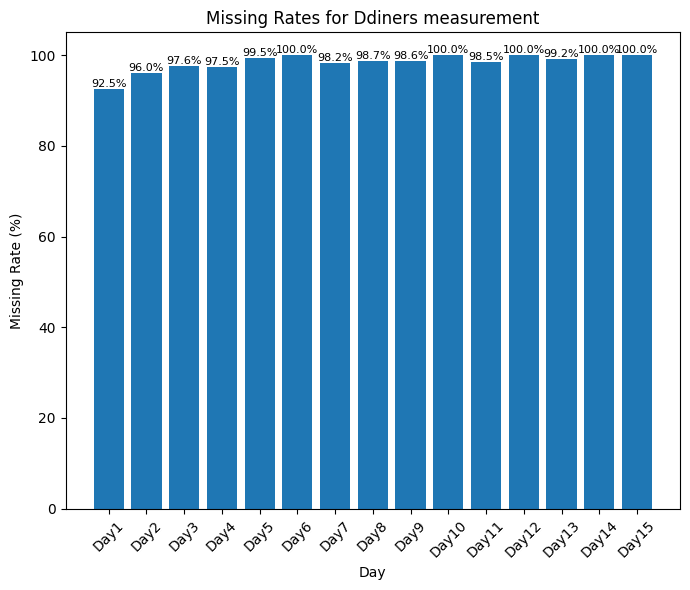

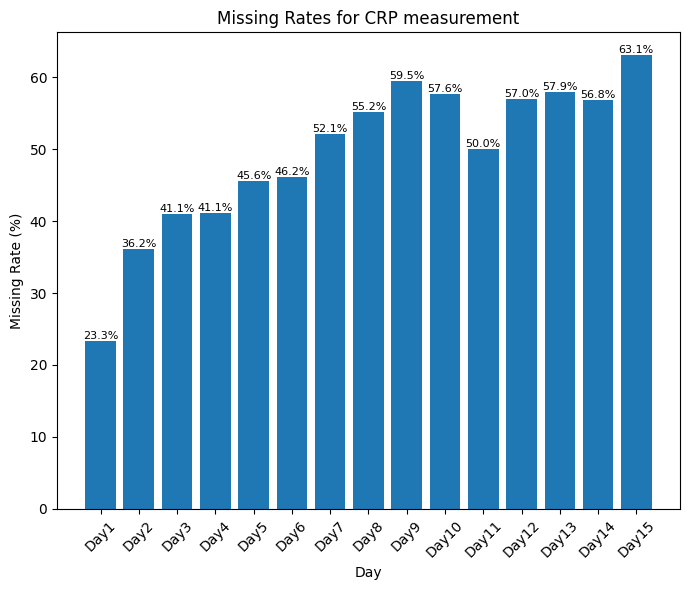

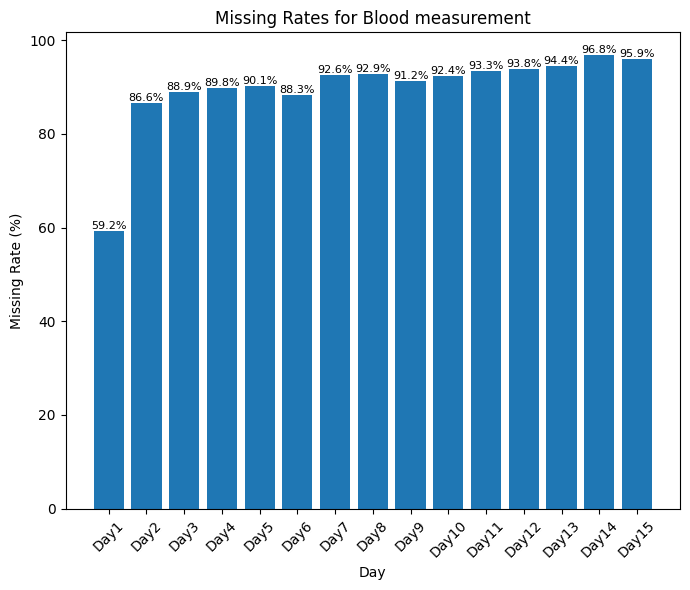

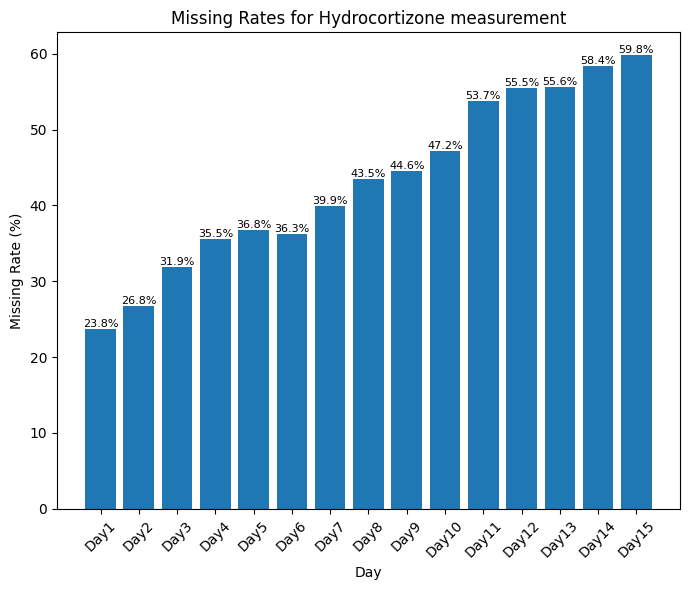

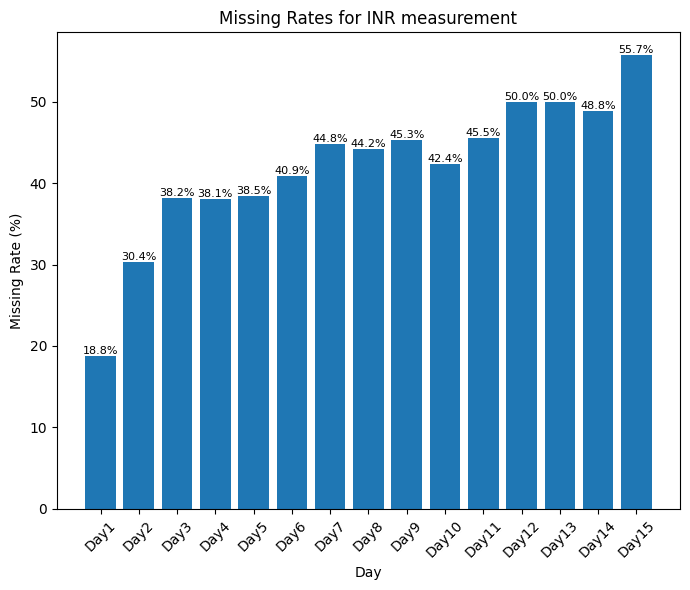

In [100]:
# select the high averaged missing values from the measurement_dict - threshold 40%
top_missing_features = [feature for feature, rate in measurement_day_missrates_avg.items() if rate > 40]

# for each selected feature -  plot a day dependant missing rates
for feature in top_missing_features:
    plt.figure(figsize=(7, 6))
    plt.bar(measurement_day_missrates_df.columns, measurement_day_missrates_df.loc[feature])
    for day, rate in zip(measurement_day_missrates_df.columns, measurement_day_missrates_df.loc[feature]):
        plt.text(day, rate, f'{rate:.1f}%', ha='center', va='bottom',fontsize=8)
    plt.xlabel('Day')
    plt.ylabel('Missing Rate (%)')
    plt.title(f'Missing Rates for {feature} measurement')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"MLHC_project/Missing Rates/clinical_data_{feature}_missingrate.png")
    plt.show()

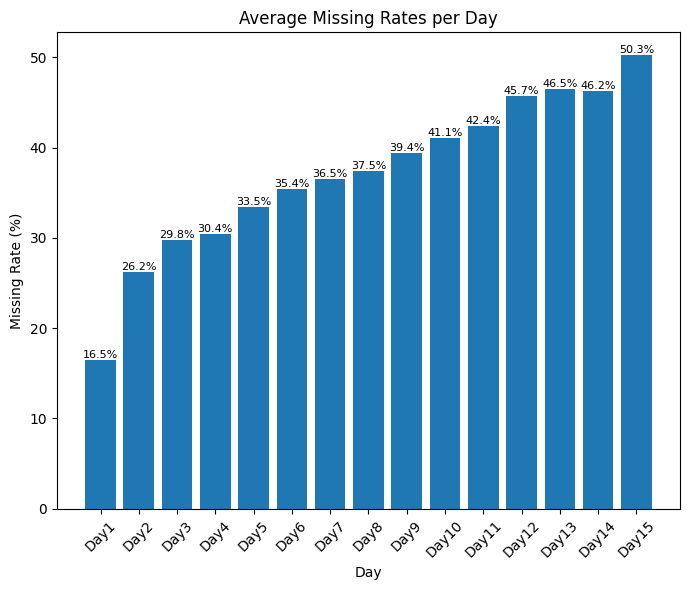

In [101]:
#@title check what are the missing rates per day average
plt.figure(figsize=(7, 6))
plt.bar(measurement_day_missrates_df.columns, measurement_day_missrates_df.mean(axis=0))
plt.xlabel('Day')
plt.ylabel('Missing Rate (%)')
plt.title(f'Average Missing Rates per Day')
for day, rate in zip(measurement_day_missrates_df.columns, measurement_day_missrates_df.mean(axis=0)):
        plt.text(day, rate, f'{rate:.1f}%', ha='center', va='bottom',fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"MLHC_project/Missing Rates/clinical_data_Day_mean_missingrate.png")

###Patients missing rate

In [102]:
patient_missing_rate={}
cols_to_check = [measurement for measurement in clinical_data_day_depended_processed.columns[1:-1] if measurement.split("_")[0] in day_prefixes ]
for patient in clinical_data.index.tolist():
  patient_data = clinical_data_day_depended_processed.loc[patient][cols_to_check]
  patient_rate = round(patient_data.isnull().sum() / patient_data[patient_data != 'inf'].shape[0]*100,3)
  patient_missing_rate[patient] = patient_rate
  print(f"Patient {patient} missing rate: {patient_rate}")


Patient A015 missing rate: 11.765
Patient A002 missing rate: 34.16
Patient A019 missing rate: 13.043
Patient A004 missing rate: 26.639
Patient A005 missing rate: 12.023
Patient A006 missing rate: 35.878
Patient A007 missing rate: 47.115
Patient A008 missing rate: 43.062
Patient A009 missing rate: 13.876
Patient A010 missing rate: 30.46
Patient A011 missing rate: 11.765
Patient A012 missing rate: 57.824
Patient A013 missing rate: 17.986
Patient A025 missing rate: 21.264
Patient A029 missing rate: 23.664
Patient A016 missing rate: 61.832
Patient A043 missing rate: 13.669
Patient A018 missing rate: 47.826
Patient B001 missing rate: 21.864
Patient B006 missing rate: 25.899
Patient B020 missing rate: 13.168
Patient B021 missing rate: 17.841
Patient B022 missing rate: 15.942
Patient B023 missing rate: 17.939
Patient C004 missing rate: 27.536
Patient A026 missing rate: 31.884
Patient A027 missing rate: 69.341
Patient A028 missing rate: 17.647
Patient C006 missing rate: 15.951
Patient C012 mis

## Olink data

In [103]:
olink_measurements = set(col[1] for col in olink_with_survival_processed.columns)
olink_missrates = {m:0 for m in olink_measurements}
for col in olink_with_survival_processed.columns:
  measurement_rate = olink_with_survival_processed[col].isnull().sum() / olink_with_survival_processed[olink_with_survival_processed[col] != 'inf'][col].shape[0]
  print(f"The missing rate of {col[1]} at day {col[4]} is: {measurement_rate:.3%}")
  olink_missrates[col[1]]+=measurement_rate
olink_missrates = {m:round(olink_missrates[m]/3,3) for m in olink_missrates}

The missing rate of IL8 at day BL is: 7.083%
The missing rate of VEGFA at day BL is: 7.083%
The missing rate of CD8A at day BL is: 7.083%
The missing rate of MCP-3 at day BL is: 7.083%
The missing rate of GDNF at day BL is: 7.083%
The missing rate of CDCP1 at day BL is: 7.083%
The missing rate of CD244 at day BL is: 7.083%
The missing rate of IL7 at day BL is: 7.083%
The missing rate of OPG at day BL is: 7.083%
The missing rate of LAP TGF-beta-1 at day BL is: 7.083%
The missing rate of uPA at day BL is: 7.083%
The missing rate of IL6 at day BL is: 7.083%
The missing rate of IL-17C at day BL is: 7.083%
The missing rate of MCP-1 at day BL is: 7.083%
The missing rate of IL-17A at day BL is: 7.083%
The missing rate of CXCL11 at day BL is: 7.083%
The missing rate of AXIN1 at day BL is: 7.083%
The missing rate of TRAIL at day BL is: 7.083%
The missing rate of IL-20RA at day BL is: 7.083%
The missing rate of CXCL9 at day BL is: 7.083%
The missing rate of CST5 at day BL is: 7.083%
The missing 

# Pivot measurements data

In [104]:
pivoted_measurements= pd.DataFrame()
for day in day_prefixes:
  measurements = [col for col in clinical_data_day_depended.columns if col.split("_")[0] == day]
  day_df = clinical_data_day_depended[measurements].reset_index()
  day_df = day_df.melt(id_vars=["Code"], value_vars=[col for col in day_df.columns[1:]], var_name="day_measurement", value_name="value")
  day_df['day_measurement'] = day_df['day_measurement'].apply(lambda x: x.split("_")[1])
  day_df['day'] = int(day[3:])
  pivoted_measurements = pd.concat([pivoted_measurements,day_df],axis=0)

pivoted_measurements = pivoted_measurements.pivot(index=['Code', 'day'], columns='day_measurement', values='value')
pivoted_measurements.reset_index(inplace=True)

# Clean Data


##Clinical Data day depended

In [107]:
#drop columns with too many missing values + Antimicrobials column
measurements_cleaned = pivoted_measurements.drop(columns=top_missing_features + ['Antimicrobials'])
measurements_cleaned.shape

(3600, 27)

In [108]:
# keeps rows that have at least 30% non-na values
measurements_cleaned = measurements_cleaned.dropna(thresh= 0.3 *measurements_cleaned.shape[1])
measurements_cleaned.shape

(2010, 27)

##Olink Data

In [109]:
#Use only BL columns from Olink data (because days 4 and 7 have too many missing values)
olink_bl_cols = []
for col in olink_data.columns:
   if col[-1] == 'BL':
    olink_bl_cols.append(col)
# olink_bl_cols
olink_bl_data = olink_with_survival_processed[olink_bl_cols]
olink_bl_data.columns = [("olink_"+str(col[1])) for col in olink_bl_cols]
olink_bl_data.shape

(240, 276)

##Clinical Data not day depended

In [110]:
print(special_cols_to_check)

['hladr1', 'hladr2', 'ferritin1', 'ferritin2', 'quantibrite1', 'quantibrite2', 'Blood', 'Respiratory', 'Urine']


In [111]:
#Remove 'Blood', 'Respiratory', 'Urine' columns
fixed_cols_clinical = list(fixed_cols_clinical) + ['survival28','outcome28']
clinical_data_fixed_features = clinical_data[fixed_cols_clinical]
clinical_data_fixed_features_cleaned = clinical_data_fixed_features.drop(columns=['Blood', 'Respiratory', 'Urine'])

#create mean value columns for 'hladr', 'ferritin', 'quantibrite' columns
cols_to_create_mean_col = ['hladr', 'ferritin', 'quantibrite']
for col in cols_to_create_mean_col:
  clinical_data_fixed_features_cleaned[col+'_mean'] = (clinical_data_fixed_features_cleaned[col+'1'] + clinical_data_fixed_features_cleaned[col+'2'])/2

clinical_data_fixed_features_cleaned.drop(columns=['hladr1', 'ferritin1', 'quantibrite1', 'hladr2', 'ferritin2', 'quantibrite2'], inplace=True)
fixed_cols_clinical_updated = clinical_data_fixed_features_cleaned.columns

In [112]:
# drop patients that died in the first day of trial
clinical_data_fixed_features_cleaned = clinical_data_fixed_features_cleaned.loc[:, ~clinical_data_fixed_features_cleaned.columns.duplicated()]
clinical_data_fixed_features_cleaned = clinical_data_fixed_features_cleaned[clinical_data_fixed_features_cleaned['survival28']>=2]

In [114]:
clinical_data_fixed_features_cleaned.shape

(224, 77)

# Imputation

## Clinical data Day depended

In [115]:
measurements_cols = measurements_cleaned.drop(columns=['day']).columns

In [116]:
#fill forward imputation for each patient separately
measurements_imputed = measurements_cleaned.groupby('Code', group_keys=False).apply(lambda x: pd.concat([x.drop(measurements_cols, axis=1), x[measurements_cols].fillna(method='ffill')], axis=1))

#Merge Data

In [117]:
data = measurements_imputed.set_index('Code').merge(clinical_data_fixed_features_cleaned, how='right', left_index=True, right_index=True)
data = data.merge(olink_bl_data, how='left', left_index=True, right_index=True)

In [118]:
data.shape

(1995, 379)

In [119]:
data.to_csv("MLHC_project/data_processed.csv")

In [120]:
import pickle
def save_obj(name,obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
# save continuous features names for feature selection
save_obj("MLHC_project/measurement_cols",measurements_imputed.columns[2:])
save_obj("MLHC_project/fixed_cols_clinical",fixed_cols_clinical_updated)